In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['axes.facecolor'] = 'white'

import random

In [2]:
walk = np.array([])

holes_num = 2
holes_all = np.array([[2.5,2.5],[7.5,2.5],[7.5,7.5],[2.5,7.5]])

holes = holes_all[0:holes_num]
holes

array([[2.5, 2.5],
       [7.5, 2.5]])

In [3]:
L = 10
step_size = 0.05*L


grid = np.zeros((int(L/step_size)+1,int(L/step_size)+1))

for r in range(len(grid)):
    grid[r,:] = np.arange(0,10+step_size,step_size) +r*step_size
#grid

In [4]:
def generate_cells(holess, seed = 123):
    random.seed(seed)
    cells_num = random.randrange(150,200)
    cells = []

    for p in range(cells_num):
        if len(holess) == 0:
            cell = [random.uniform(0,10),random.uniform(0,10)]
        else:
            cell = holess[0]
            mindist = 0
            while mindist < 0.2*L:
                cell = [random.uniform(0,10),random.uniform(0,10)]
                mindist = min([np.sqrt(sum((cell-h)**2)) for h in holess])

        cells.append(cell)
    return cells

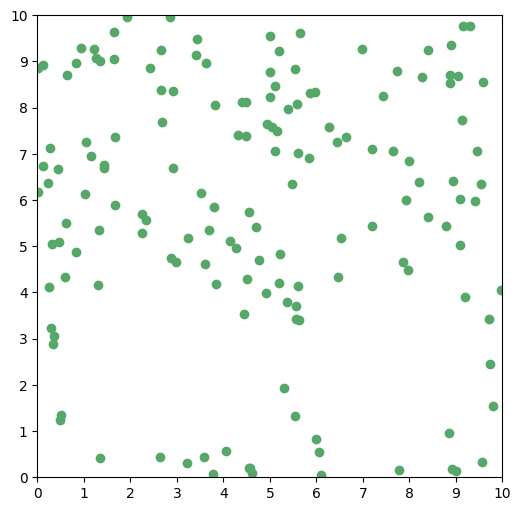

In [6]:
cells = generate_cells(holes)

plt.figure(figsize=(6,6))
plt.scatter(*np.array(cells).T, c='C1')
plt.xlim((0,10))
plt.ylim((0,10))
plt.xticks(range(11));
plt.yticks(range(11));

In [6]:
def hole_check(point, holess):
    if len(point) == 0:
        return False
    elif point[0]<0 or point[0]>10 or point[1]<0 or point[1]>10:
        return False
    elif len(holess) == 0:
        return True
    else:
        mindist = min([np.sqrt(sum((point-h)**2)) for h in holes])
        if mindist < 0.2*L: return False
        else: return True

In [7]:
## Walk simulation

seed = 1234
random.seed(seed)

holes_num = 2
holes = holes_all[0:holes_num]
cells = generate_cells(holes, seed)

current = []
while hole_check(current, holes) == False:
    current = [random.choice(np.arange(0,10+step_size,step_size)), random.choice(np.arange(0,10+step_size,step_size))]

#print('---', current)

walk = [current,]

for s in range(5000-1):
    options_index = np.array([[1,0],[0,1],[-1,0],[0,-1]])*step_size
    options = []
    for opt in options_index:
        possible = [current[0]+opt[0],current[1]+opt[1]]
        if hole_check(possible,holes):
            options.append(possible)
    #print(options)
    current = random.choice(options)
    walk.append(current)

roster = np.zeros((len(cells),len(walk)))

for i,c in enumerate(np.array(cells)):
    for j,p in enumerate(np.array(walk)):
        if np.sqrt(sum((p-c)**2)) < 0.05*L:
            roster[i,j] = 1

np.sum(roster==1)

8741

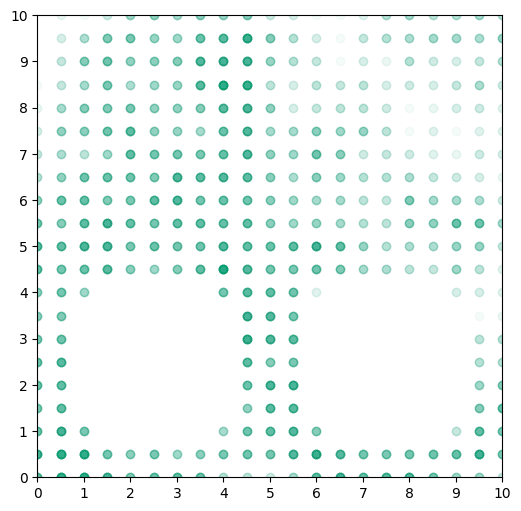

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(*np.array(holes+20).T)
plt.scatter(*np.array(walk).T, alpha=0.04)
plt.xlim((0,10))
plt.ylim((0,10))
plt.xticks(range(11));
plt.yticks(range(11));

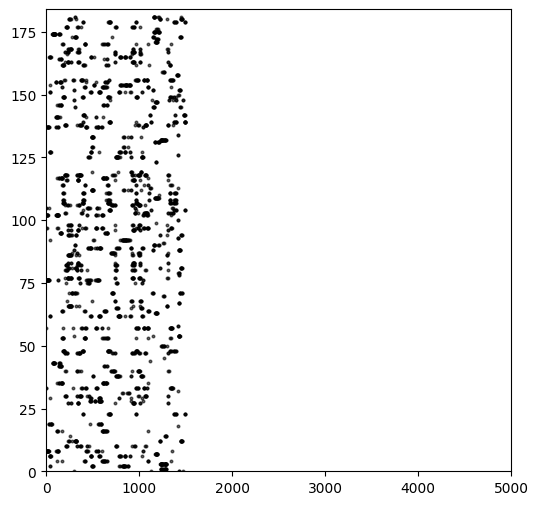

In [351]:
plt.figure(figsize=(6,6))
plt.xlim((0,5000))
plt.ylim((0,cells_num))

for i in range(roster.shape[0]):
    for j in range(1500):#roster.shape[1]):
        if roster[i,j] == 1:
            plt.scatter(*[j,i], s=3.5, c='k', alpha = 0.6)

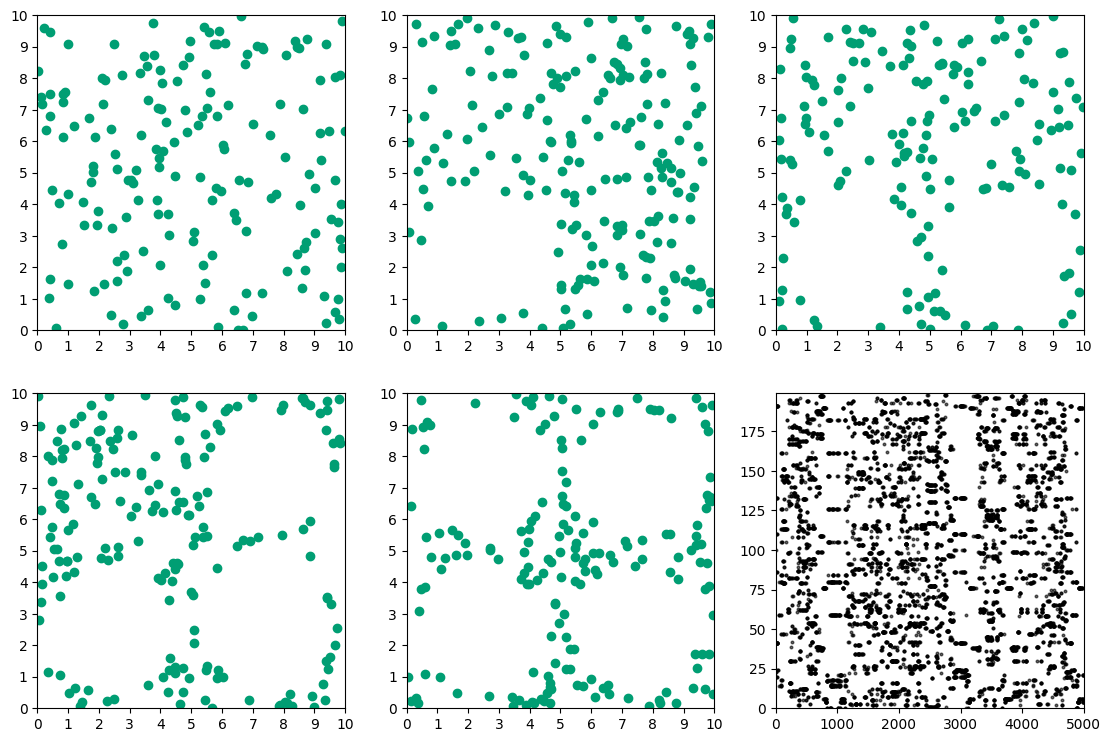

In [17]:
random.seed(123)

plt.figure(figsize=(13.5,9))

for h_num in range(5):
    plt.subplot(2,3,h_num+1)
    holes_fig = holes_all[0:h_num]
    cells_fig = generate_cells(holes_fig, seed=1234*h_num)

    plt.scatter(*np.array(holes_fig+20).T)
    plt.scatter(*np.array(cells_fig).T)
    plt.xlim((0,10))
    plt.ylim((0,10))
    plt.xticks(range(11));
    plt.yticks(range(11));

###


plt.subplot(2,3,6)
plt.xlim((0,5000))
plt.ylim((0,len(cells)))

for i in range(roster.shape[0]):
    for j in range(roster.shape[1]):
        if roster[i,j] == 1:
            plt.scatter(*[j,i], s=3.5, c='k', alpha = 0.6)

#plt.savefig('../figures/sample_arenas.png', bbox_inches='tight',dpi = 400)